<a href="https://colab.research.google.com/github/VratiB/Machine-Learning/blob/main/TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Titanic

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_1/Datasets/Competition_Dataset/titanic/train.csv')

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.shape

(891, 12)

*** There are total 891 rows/ records in dataset.
And 12 columns/ features. ***

## Null values

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*** There are 687 null_values in 'Cabin' feature; as there are high percentage of NULL_Values, we will DROP it. ***

## Dropping the feature Cabin

In [ ]:
df=titanic.drop(['Cabin'],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Filling Null values

In [ ]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [ ]:
df.Embarked.mode()

0    S
dtype: object

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Categorical Features

In [ ]:
categorical_var=df.select_dtypes(include='object')
categorical_var

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [ ]:
categorical_var.shape

(891, 4)

## Categorical Features are:
- Name
- Sex
- Ticket
- Embarked

## Numerical Features

In [ ]:
numerical_var=df.select_dtypes(include='number')
numerical_var

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [ ]:
numerical_var.shape

(891, 7)

## Numerical Features are:
- PassengerId
- Survived
- Pclass
- Age
- SibSp
- Parch
- Fare

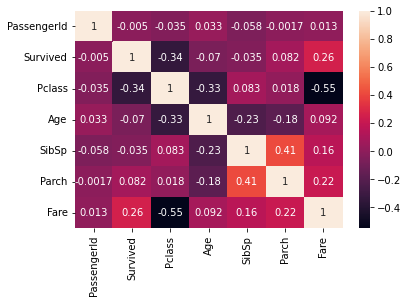

In [ ]:
sns.heatmap(data=df.corr(),annot=True)

## Sex VS Survived

In [ ]:
x1=df.groupby('Sex')['Survived'].value_counts()   # 1:survived 
x1                                                # 0: Not survived

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

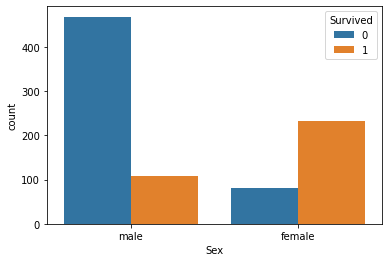

In [ ]:
sns.countplot(x='Sex',data=df,hue='Survived')

*** This shows, more number of females survied as compared to males ***

## Pivot Table

In [ ]:
pd.pivot_table(data=df,index=['Embarked','Sex','Pclass','Survived'],values='Age',aggfunc='mean')

Age
Embarked Sex    Pclass Survived           
C        female 1      0         50.000000
                       1         34.964181
                2      1         19.142857
                3      0         24.074669
                       1         16.019765
         male   1      0         40.379824
                       1         36.041125
                2      0         29.524890
                       1         15.349559
                3      0         28.529902
                       1         21.851735
Q        female 1      1         33.000000
                2      1         29.849559
                3      0         28.810719
                       1         27.178468
         male   1      0         44.000000
                2      0         57.000000
                3      0         29.113325
                       1         29.466078
S        female 1      0         13.500000
                       1         33.974926
                2      0         36.000000
                       1         29.101625
                3      0         24.781658
                       1         22.981765
         male   1      0         41.984123
                       1         35.204160
                2      0         33.142618
                       1         17.935275
                3      0         27.683370
                       1         23.729308

In [ ]:
C=df[(df['Survived']==0) & (df['Embarked']=='C') & (df['Sex']=='female') & (df['Pclass']==2)]
C

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
Q1=df[(df['Survived']==0) & (df['Embarked']=='Q') & (df['Sex']=='female') & (df['Pclass']==1)]
Q1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
Q2=df[(df['Survived']==0) & (df['Embarked']=='Q') & (df['Sex']=='female') & (df['Pclass']==2)]
Q2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
M1=df[(df['Survived']==1) & (df['Embarked']=='Q') & (df['Sex']=='male') & (df['Pclass']==1)]
M1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
M2=df[(df['Survived']==1) & (df['Embarked']=='Q') & (df['Sex']=='male') & (df['Pclass']==2)]
M2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


## We can say:
- All Females of 2nd_Class who embarked from Cherbourg Survived.
- All Females of 1st_class and 2nd_Class who embarked from Queenstown Survived.
- All Males of 1st_class and 2nd_Class who embarked from Queenstown Died.

In [ ]:
percent_class_surv = df.groupby('Pclass')["Pclass","Survived"].mean()
percent_class_surv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


## We can say,
- More pencentage of people who booked 1st_class ticket survived.
- On the other hand only 24% people who booked 3rd_class ticket survived.
- There are approx.50% people who survived and 50% people who died from 2nd_class. 

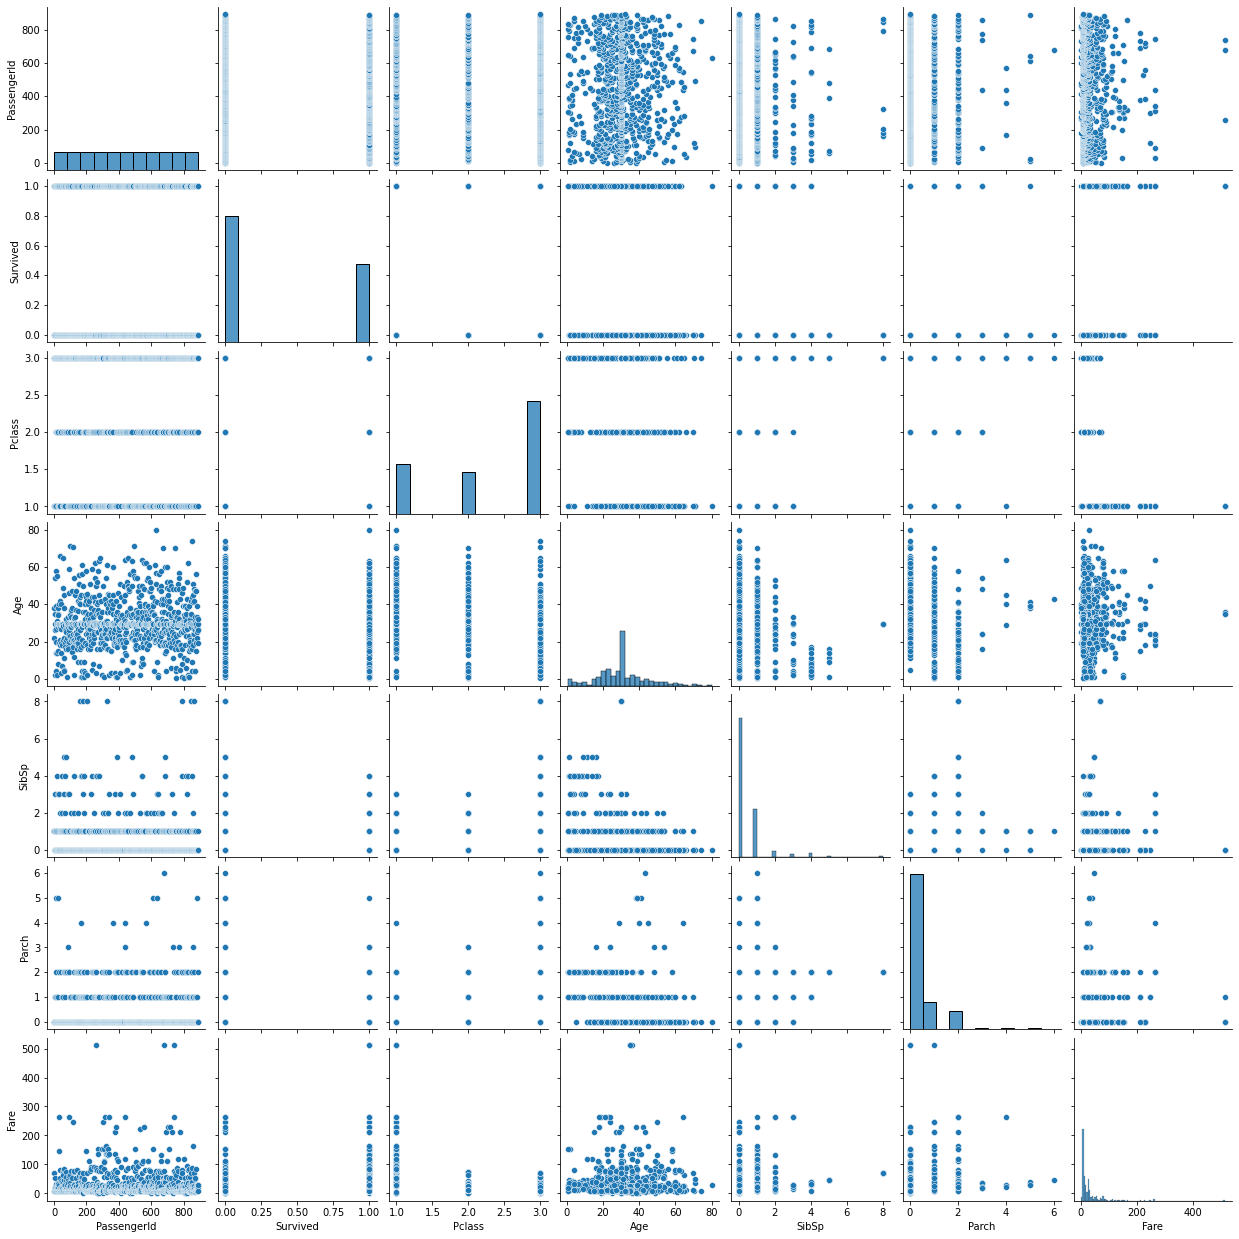

In [ ]:
sns.pairplot(df)

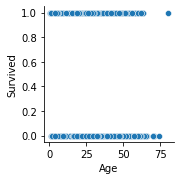

In [ ]:
sns.pairplot(x_vars='Age',y_vars='Survived',data=df)

In [ ]:
a=df[(df['Age']>60) & (df['Survived']==1)]
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,S


*** Only 5 Senior_Citizens survived the titanic disaster. ***

In [ ]:
b = df[(df['Age']<20)]
b['Survived'].mean()

0.4817073170731707

In [ ]:
c = df[(df['Age']>=21) & (df['Age']<60)]
c['Survived'].mean()

0.36934306569343067

In [ ]:
d = df[(df['Age']<20) & (df['Sex']=='female')]
d['Survived'].mean()

0.7066666666666667

In [ ]:
d = df[(df['Age']<20) & (df['Sex']=='male')]
d['Survived'].mean()

0.29213483146067415

In [ ]:
e = df[(df['Age']>21) & (df['Sex']=='female') & (df['Age']<60)]
e['Survived'].mean()

0.7610619469026548

In [ ]:
f = df[df['Sex']=='female']
f['Survived'].mean()

0.7420382165605095

In [ ]:
g = df[df['Sex']=='male']
g['Survived'].mean()

0.18890814558058924

## Model Building

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_1/Datasets/Competition_Dataset/titanic/test.csv')
copy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_1/Datasets/Competition_Dataset/titanic/test.csv')

In [ ]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Embarked'],axis=1)
test=test.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket','Fare','Embarked'],axis=1)

In [ ]:
df['Sex']=df.Sex.map({'female':0,'male':1})
test['Sex']=test.Sex.map({'female':0,'male':1})

In [ ]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [ ]:
test.head()

,Pclass,Sex,Age
0,3,1,34.5
1,3,0,47.0
2,2,1,62.0
3,3,1,27.0
4,3,0,22.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=777,test_size=0.3, stratify=y)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logit.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.8246268656716418

In [ ]:
confusion_matrix(y_test,y_pred)

array([[141,  24],
       [ 23,  80]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       165
           1       0.77      0.78      0.77       103

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



## Prediction on Test Dataset

In [ ]:
test.isna().sum()

Pclass     0
Sex        0
Age       86
dtype: int64

In [ ]:
test['Age'] = test['Age'].fillna(test.Age.mean())
test.isna().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [ ]:
submission_pred = logit.predict(test)

In [ ]:
final = pd.DataFrame({'PassengerId':copy.PassengerId.values, 'Survived':submission_pred})

In [ ]:
final.to_csv('finalsubmission.csv',index=False)